### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 9})

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
calcularPromedio = lambda iter, columna: round(sum(iter[columna]) / len(iter[columna]), 2)

tiendas = [tienda, tienda2, tienda3, tienda4]
nombresTiendas = ["Primer tienda", "Segunda tienda", "Tercer tienda", "Cuarta tienda"]

ingresos = []
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8a5043']

# Ingreso total por cada tienda

for idTienda, nombre in zip(tiendas, nombresTiendas):
    ingresoTienda = sum(idTienda["Precio"])
    print(f"\nEl ingreso total de la {nombre} es de {ingresoTienda}\n")
    ingresos.append(ingresoTienda)


El ingreso total de la Primer tienda es de 1150880400.0


El ingreso total de la Segunda tienda es de 1116343500.0


El ingreso total de la Tercer tienda es de 1098019600.0


El ingreso total de la Cuarta tienda es de 1038375700.0



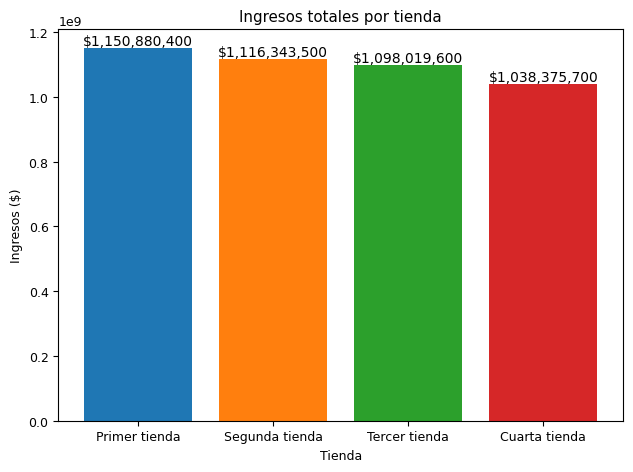

In [ ]:
barras = plt.bar(nombresTiendas, ingresos, color=colores)

# La siguiente iteración sirve para colocar un texto sobre cada barra indicando el total generado por cada tienda
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos ($)")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría


Ventas por categoria de la Primer tienda


Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64



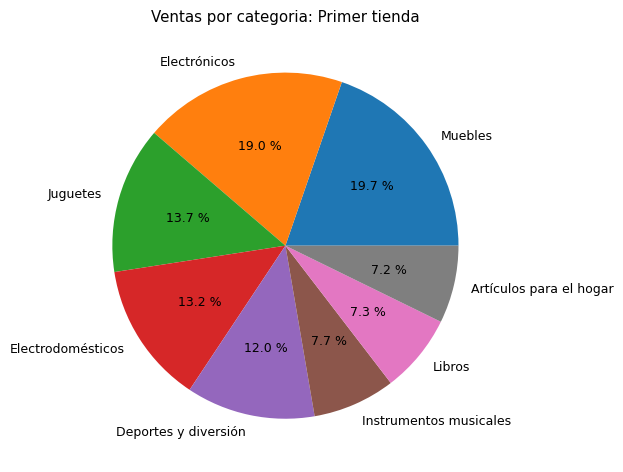


Ventas por categoria de la Segunda tienda


Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64



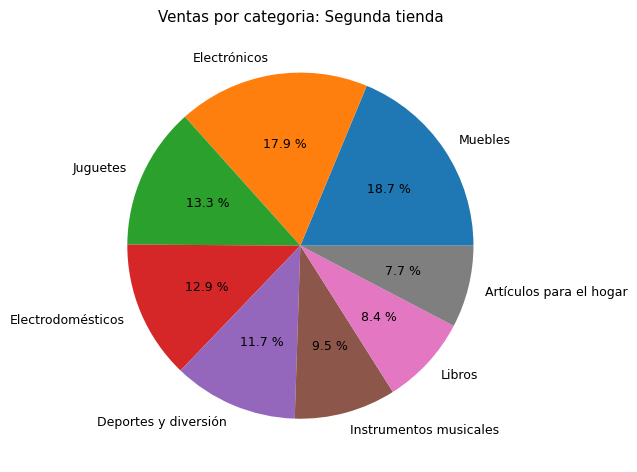


Ventas por categoria de la Tercer tienda


Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64



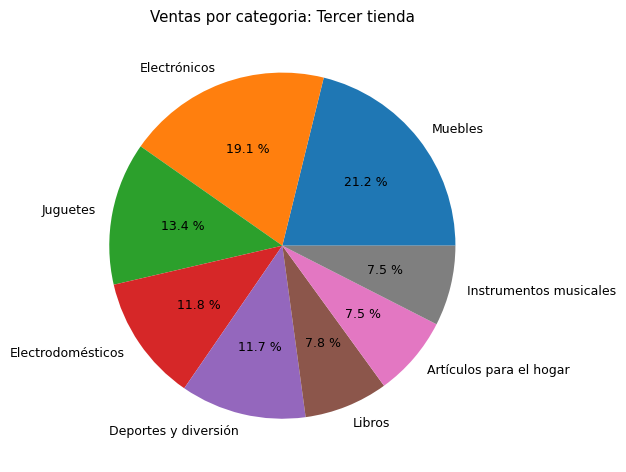


Ventas por categoria de la Cuarta tienda


Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
dtype: int64



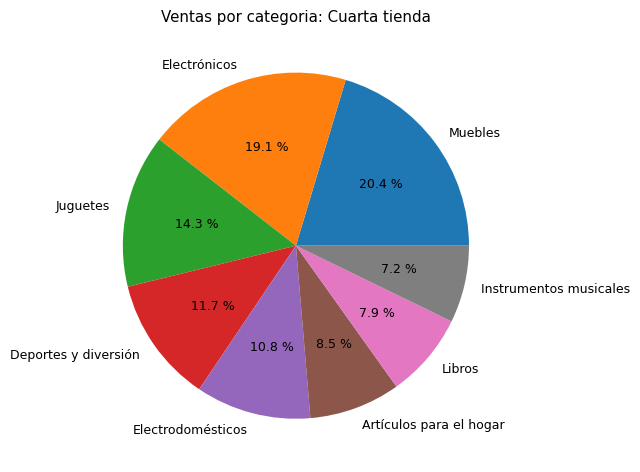

In [ ]:
for idTienda, nombre in zip(tiendas, nombresTiendas):
  # agrupa por categoria y cuenta cuantas veces aparece cada una
    conteoPorCategoria = idTienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
    print(f"\nVentas por categoria de la {nombre}\n")
    print(f"\n{conteoPorCategoria}\n")
    plt.pie(conteoPorCategoria, labels=conteoPorCategoria.index, autopct="% 0.1f %%")
    plt.title(f"Ventas por categoria: {nombre}")
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = []

for idTienda, nombre in zip(tiendas, nombresTiendas):
    calificacion = calcularPromedio(idTienda, "Calificación")
    print(f"La calificación media de la {nombre} es de {calificacion}")
    calificaciones.append(calificacion)

La calificación media de la Primer tienda es de 3.98
La calificación media de la Segunda tienda es de 4.04
La calificación media de la Tercer tienda es de 4.05
La calificación media de la Cuarta tienda es de 4.0


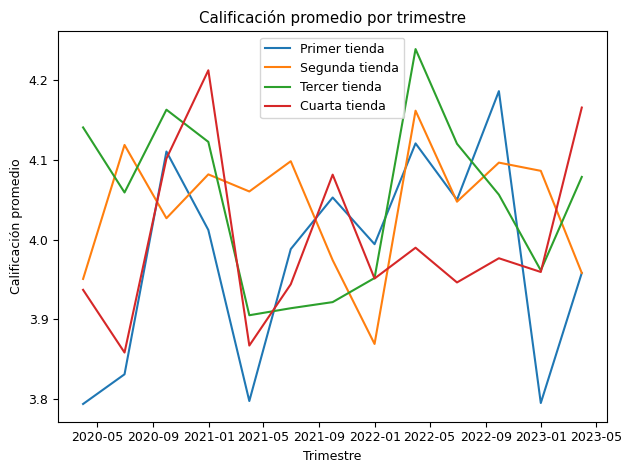

In [ ]:
# generando el grafico
for idTienda, nombre in zip(tiendas, nombresTiendas):
    # debido a que los datos cargados en la columna "Fecha de Compra" se cargaron como strings, con el método .to_datetime() cambiamos el tipo de dato de string a un objeto datetime de pandas
    idTienda["Fecha de Compra"] = pd.to_datetime(idTienda["Fecha de Compra"], dayfirst=True)
    # ordenamos los valores
    idTienda = idTienda.sort_values("Fecha de Compra")
    # agrupamos por trimestres y calculamos el promedio
    calificacionesTrimestrales = idTienda.resample("QE", on="Fecha de Compra")["Calificación"].mean()
    plt.plot(calificacionesTrimestrales.index, calificacionesTrimestrales, label=nombre)

plt.title("Calificación promedio por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Calificación promedio")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


Los 5 productos mas vendidos de la Primer tienda son: Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64 

 

Los 5 productos menos vendidos de la Primer tienda son: Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
dtype: int64 

 


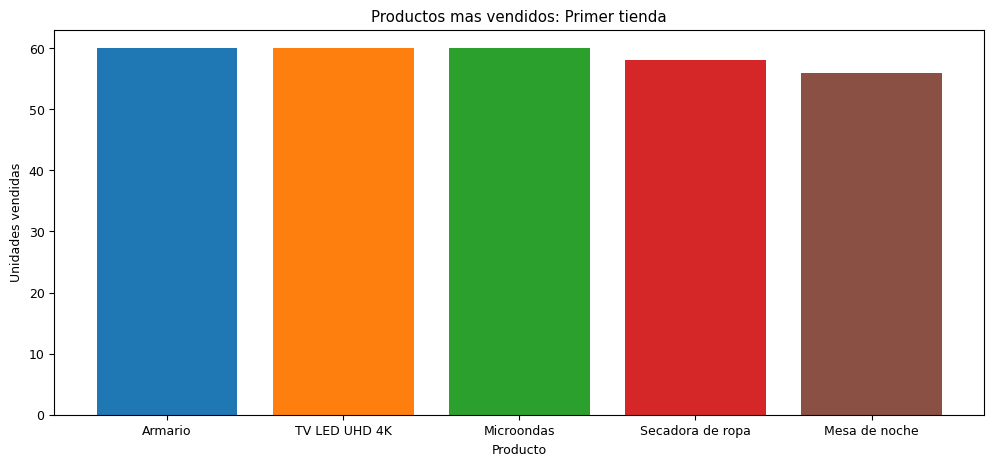

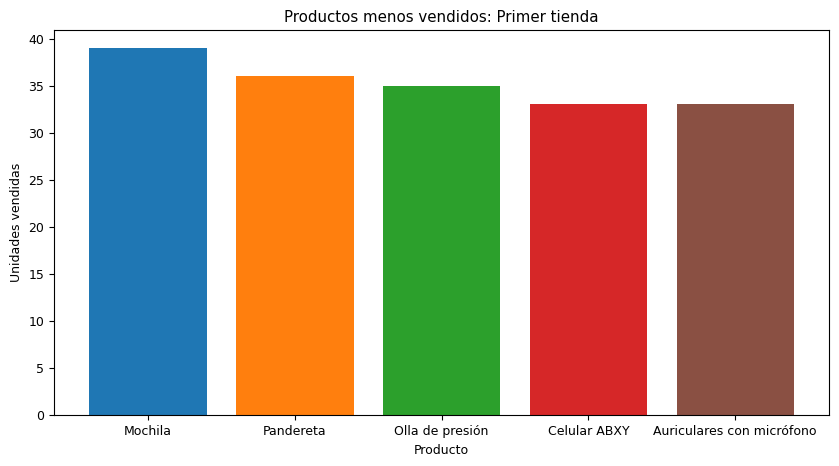


Los 5 productos mas vendidos de la Segunda tienda son: Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64 

 

Los 5 productos menos vendidos de la Segunda tienda son: Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
dtype: int64 

 


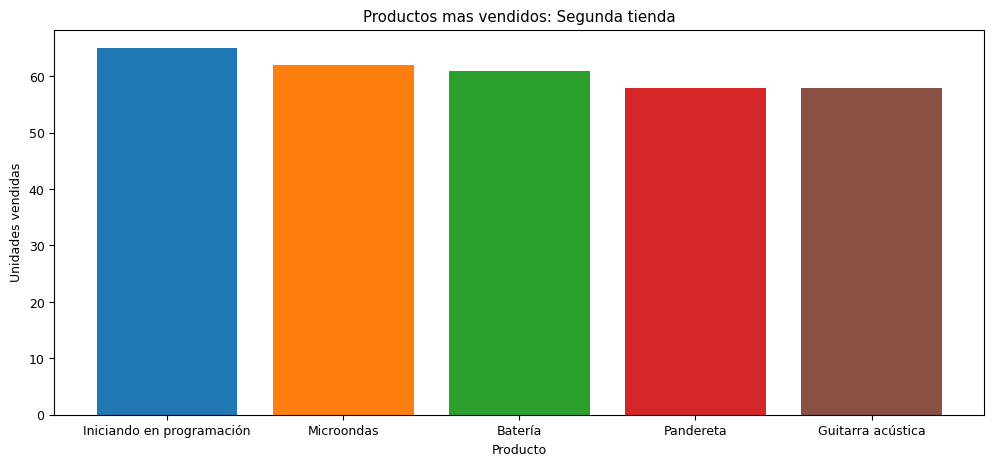

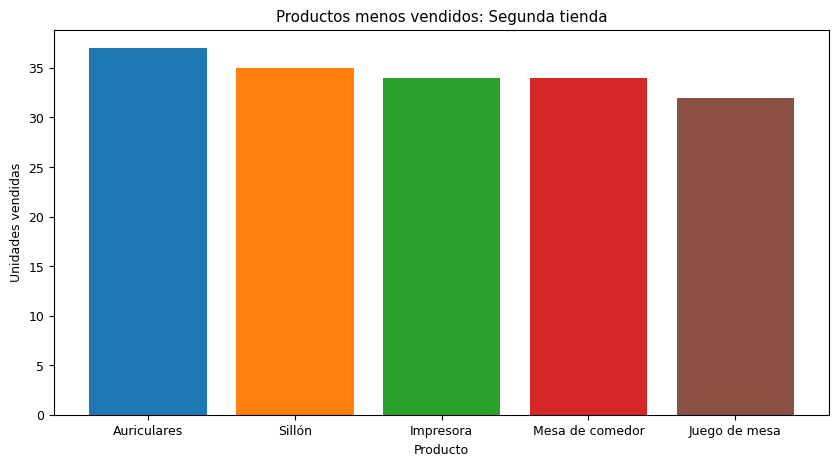


Los 5 productos mas vendidos de la Tercer tienda son: Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64 

 

Los 5 productos menos vendidos de la Tercer tienda son: Producto
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35
dtype: int64 

 


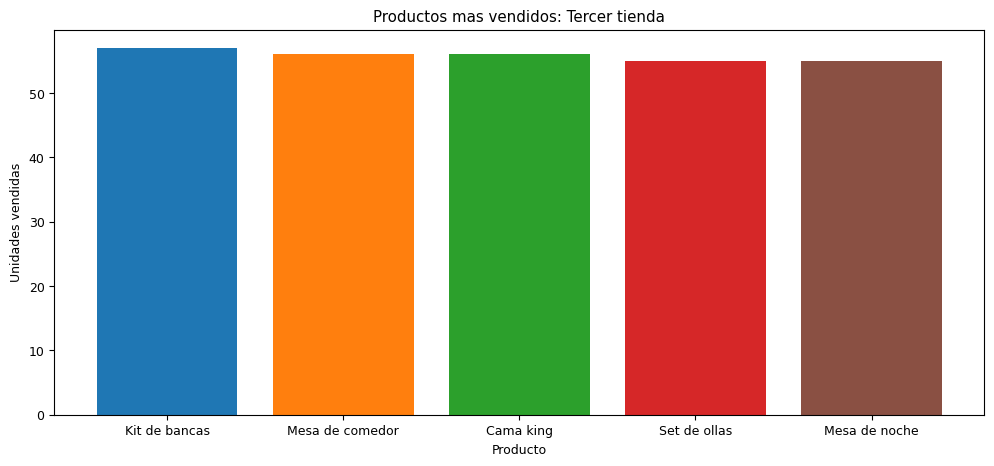

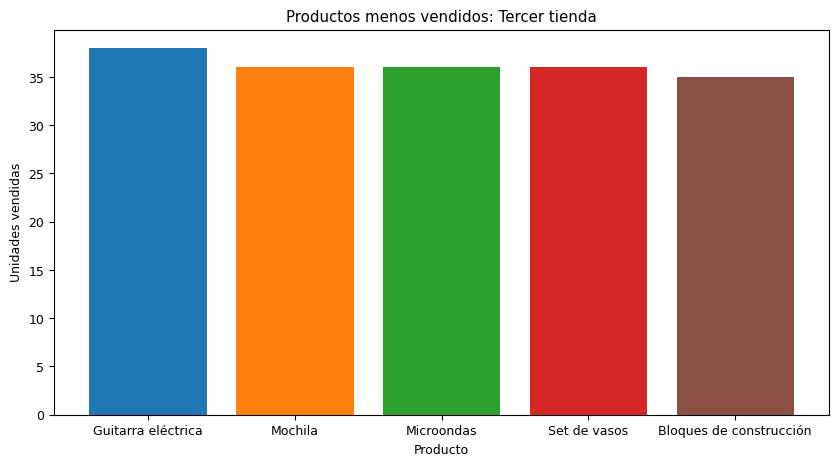


Los 5 productos mas vendidos de la Cuarta tienda son: Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
dtype: int64 

 

Los 5 productos menos vendidos de la Cuarta tienda son: Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
dtype: int64 

 


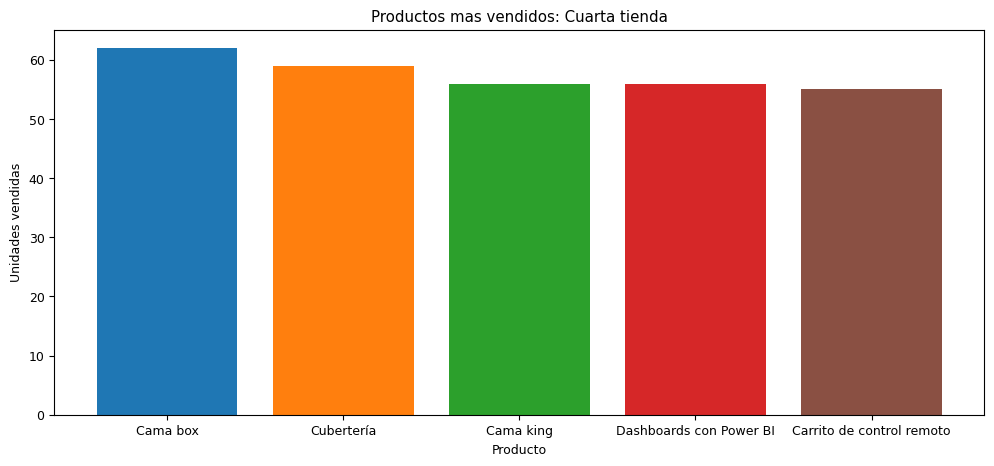

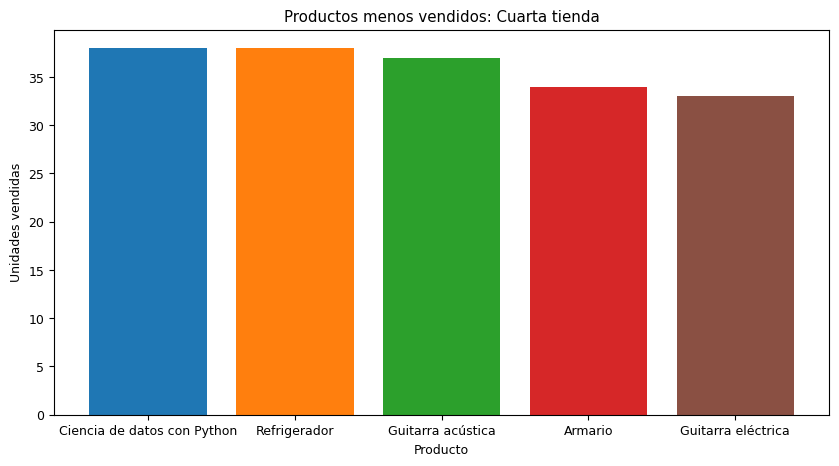

In [ ]:
# por cantidad

for idTienda, nombre in  zip(tiendas, nombresTiendas):
    conteoProductos = idTienda.groupby("Producto").size().sort_values(ascending=False)
    masVentas = conteoProductos.head(5) # toma los 5 productos mas vendidos
    menosVentas = conteoProductos.tail(5) # toma los 5 productos menos vendidos
    #print(f"\n\n{conteoProductos}\n\n")
    print(f"\nLos 5 productos mas vendidos de la {nombre} son: {masVentas} \n\n ")
    print(f"\nLos 5 productos menos vendidos de la {nombre} son: {menosVentas} \n\n ")
    plt.figure(figsize=[12, 5])
    plt.bar(masVentas.index, masVentas.values, color=colores)
    plt.title(f"Productos mas vendidos: {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Unidades vendidas")
    plt.show()

    plt.figure(figsize=[10, 5])
    plt.bar(menosVentas.index, menosVentas.values, color=colores)
    plt.title(f"Productos menos vendidos: {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Unidades vendidas")
    plt.show()



Productos mas vendidos segun valor en ventas: Producto
TV LED UHD 4K         142150200.0
Refrigerador          112143300.0
Iphone 15              97902200.0
Smart TV               67452100.0
Lavadora de ropa       65783600.0
Lavavajillas           62054900.0
Secadora de ropa       59062400.0
Tablet ABXY            47639800.0
Batería                37693900.0
Guitarra eléctrica     37292200.0
Name: Precio, dtype: float64


Productos menos vendidos según valor en ventas: Producto
Iniciando en programación      2093100.0
Ciencia de datos con Python    2063600.0
Muñeca bebé                    1937300.0
Bloques de construcción        1865700.0
Dashboards con Power BI        1455700.0
Ajedrez de madera              1430600.0
Set de vasos                   1359100.0
Cubo mágico 8x8                 696900.0
Dinosaurio Rex                  688900.0
Cuerda para saltar              652800.0
Name: Precio, dtype: float64



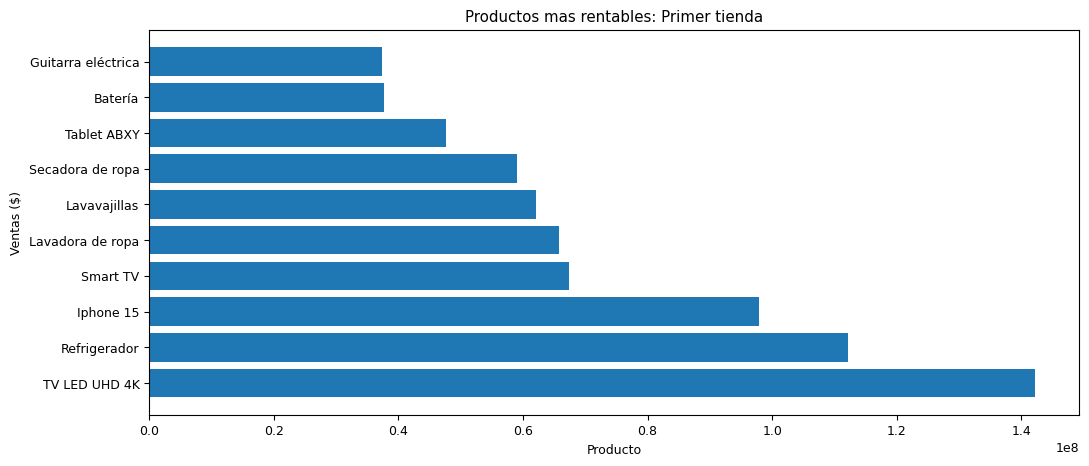

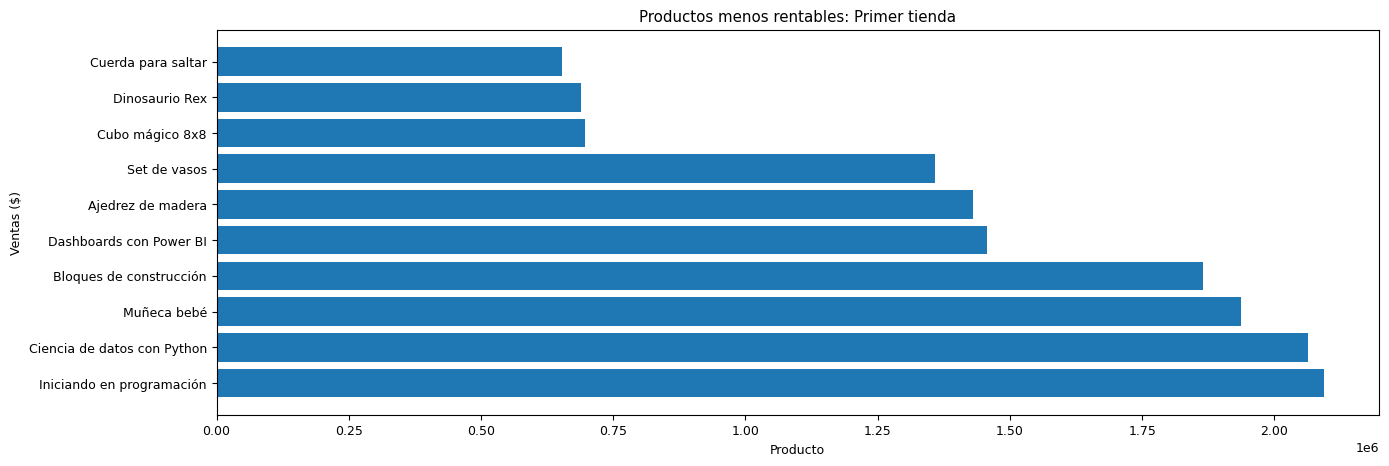


Productos mas vendidos segun valor en ventas: Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Secadora de ropa     59115100.0
Lavavajillas         58767500.0
Tablet ABXY          56209800.0
Batería              46175300.0
Celular ABXY         41668900.0
Name: Precio, dtype: float64


Productos menos vendidos según valor en ventas: Producto
Vaso térmico               2155900.0
Balón de baloncesto        2091300.0
Bloques de construcción    1789400.0
Cubertería                 1732900.0
Dashboards con Power BI    1599500.0
Set de vasos               1542600.0
Ajedrez de madera          1287700.0
Cuerda para saltar          856900.0
Dinosaurio Rex              770300.0
Cubo mágico 8x8             643600.0
Name: Precio, dtype: float64



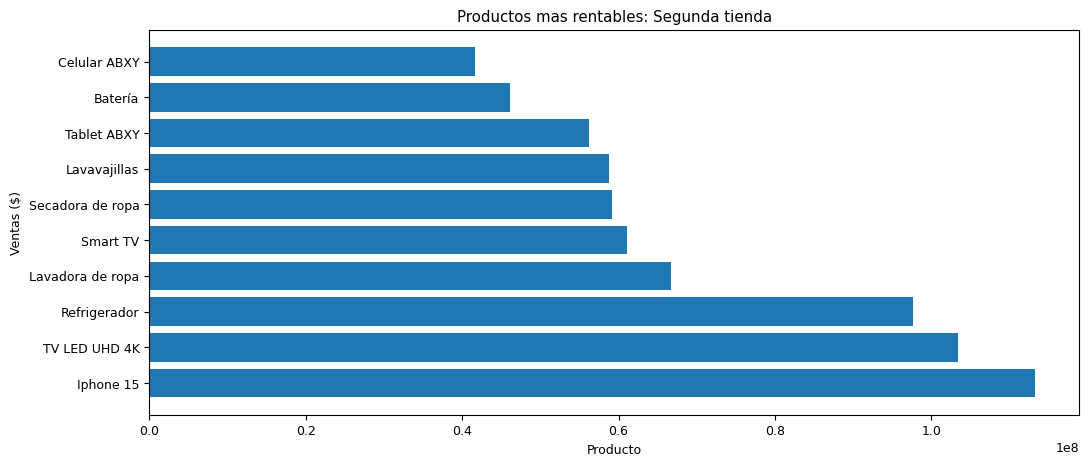

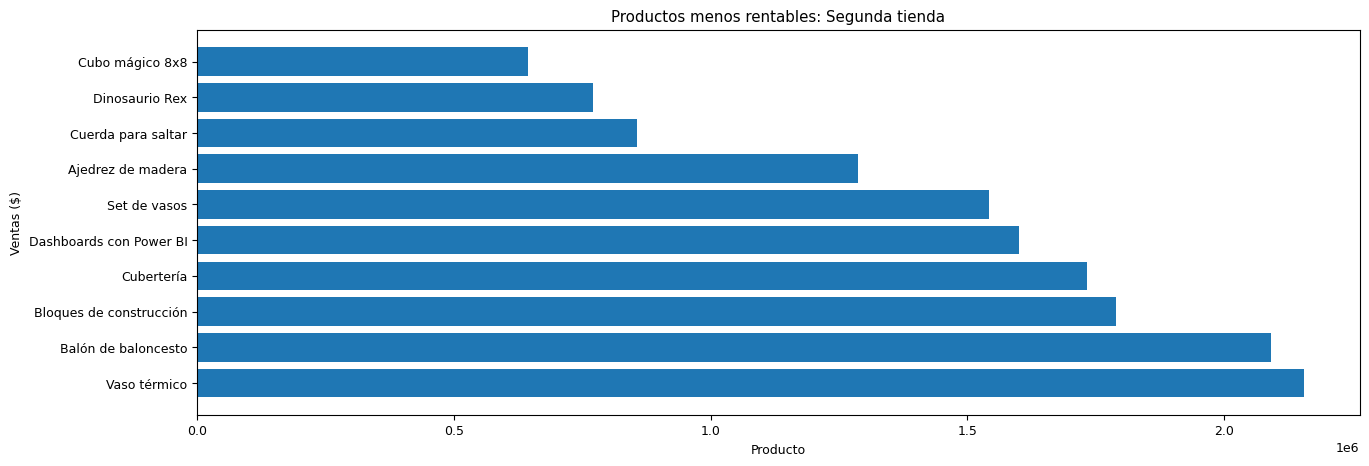


Productos mas vendidos segun valor en ventas: Producto
Refrigerador        99889700.0
TV LED UHD 4K       96669100.0
Iphone 15           93225700.0
Smart TV            78837300.0
Lavavajillas        64364800.0
Tablet ABXY         58440100.0
Lavadora de ropa    57459100.0
Secadora de ropa    49798300.0
Celular ABXY        43419600.0
Cama king           38834700.0
Name: Precio, dtype: float64


Productos menos vendidos según valor en ventas: Producto
Muñeca bebé                1932600.0
Cubertería                 1775900.0
Vaso térmico               1725600.0
Dashboards con Power BI    1372600.0
Ajedrez de madera          1355300.0
Bloques de construcción    1237200.0
Set de vasos               1210700.0
Cuerda para saltar          853800.0
Dinosaurio Rex              795600.0
Cubo mágico 8x8             640400.0
Name: Precio, dtype: float64



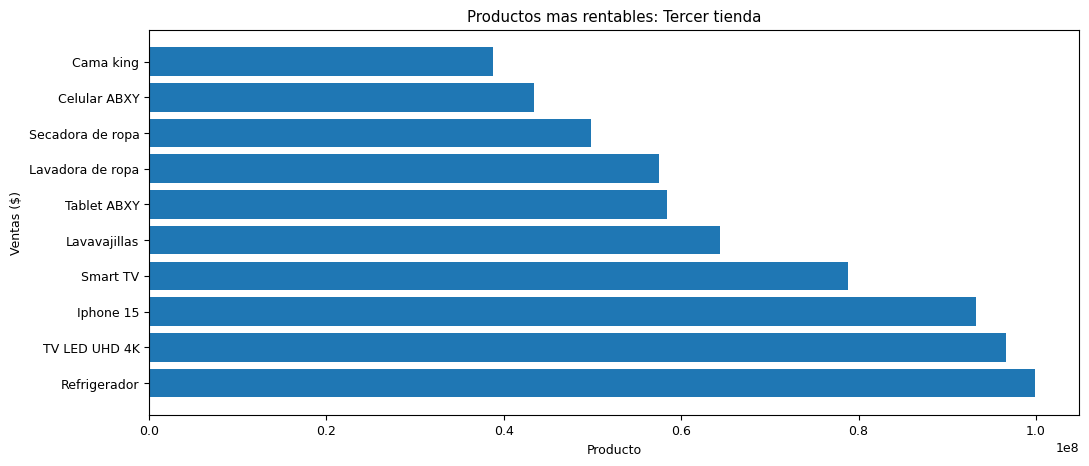

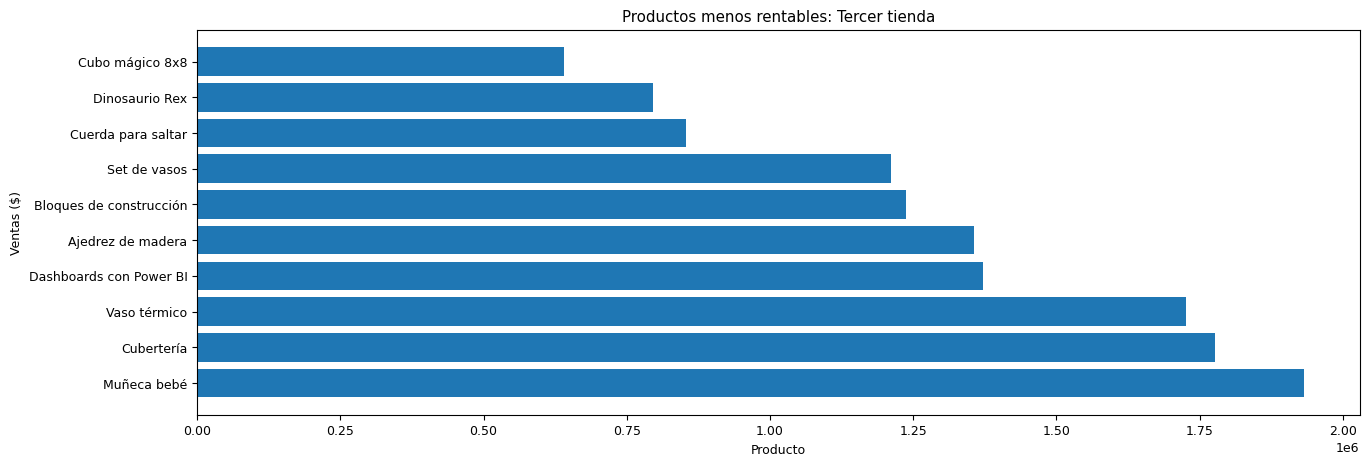


Productos mas vendidos segun valor en ventas: Producto
Iphone 15           96697500.0
TV LED UHD 4K       90295300.0
Smart TV            82790400.0
Refrigerador        75271900.0
Tablet ABXY         56723100.0
Lavavajillas        55349300.0
Lavadora de ropa    52463600.0
Secadora de ropa    42262200.0
Celular ABXY        40171600.0
Cama king           37555400.0
Name: Precio, dtype: float64


Productos menos vendidos según valor en ventas: Producto
Vaso térmico                   2152500.0
Iniciando en programación      2118200.0
Ciencia de datos con Python    2108800.0
Dashboards con Power BI        1990600.0
Bloques de construcción        1909800.0
Set de vasos                   1471800.0
Ajedrez de madera              1075500.0
Dinosaurio Rex                  858100.0
Cubo mágico 8x8                 748400.0
Cuerda para saltar              704800.0
Name: Precio, dtype: float64



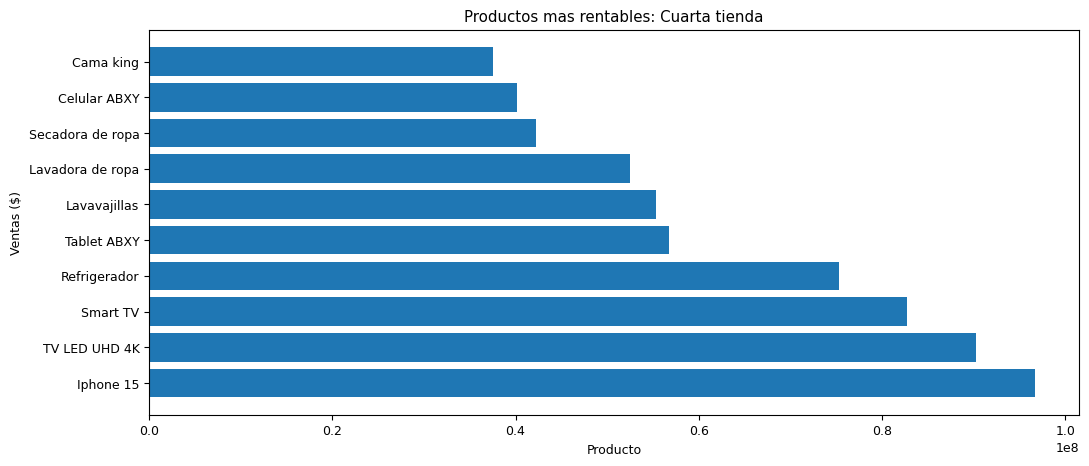

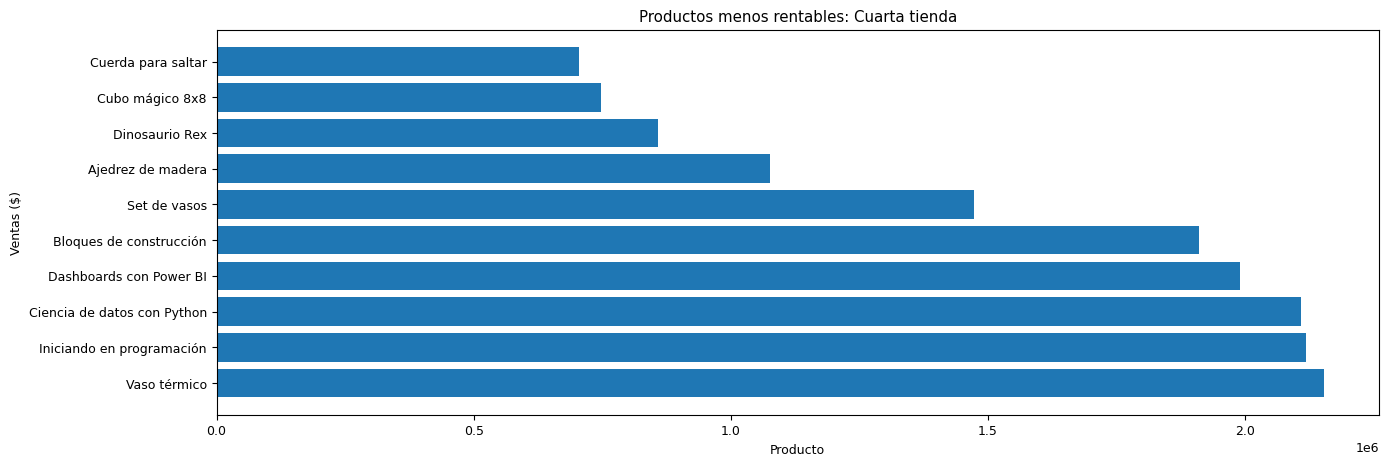

In [ ]:
# por valor en ventas

for idTienda, nombre in zip(tiendas, nombresTiendas):
    # se agrupa por producto y suma los valores de la columna precio para cada producto
    conteoPorVentas = idTienda.groupby("Producto")["Precio"].sum().sort_values(ascending=False)
    masRentables = conteoPorVentas.head(10) # toma los 10 productos mas vendidos
    menosRentables = conteoPorVentas.tail(10) # toma los 10 productos menos vendidos
    print(f"\nProductos mas vendidos segun valor en ventas: {masRentables}\n")
    print(f"\nProductos menos vendidos según valor en ventas: {menosRentables}\n")
    plt.figure(figsize=[12.0, 5.0])
    plt.barh(masRentables.index, masRentables.values)
    plt.title(f"Productos mas rentables: {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Ventas ($)")
    plt.show()

    plt.figure(figsize=[15.0, 5.0])
    plt.barh(menosRentables.index, menosRentables.values)
    plt.title(f"Productos menos rentables: {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Ventas ($)")
    plt.show()

# 5. Envío promedio por tienda

In [ ]:
promediosDeEnvios = []
for idTienda, nombre in  zip(tiendas, nombresTiendas):
    promedio = calcularPromedio(idTienda, "Costo de envío")
    print(f"En promedio, el total gastado en envios en la {nombre} fue de {promedio}")
    promediosDeEnvios.append(promedio)

En promedio, el total gastado en envios en la Primer tienda fue de 26018.61
En promedio, el total gastado en envios en la Segunda tienda fue de 25216.24
En promedio, el total gastado en envios en la Tercer tienda fue de 24805.68
En promedio, el total gastado en envios en la Cuarta tienda fue de 23459.46


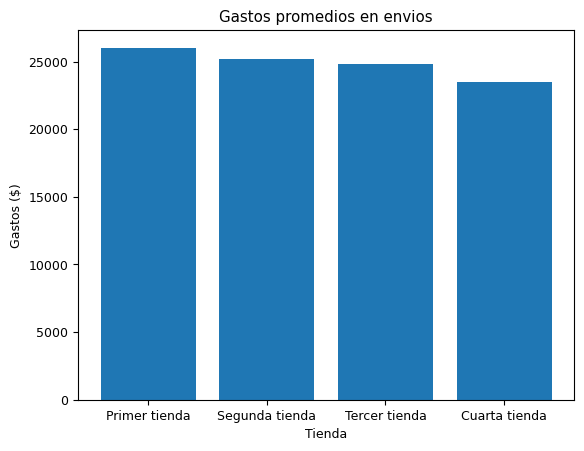

In [ ]:
plt.bar(nombresTiendas, promediosDeEnvios)
plt.title("Gastos promedios en envios")
plt.xlabel("Tienda")
plt.ylabel("Gastos ($)")
plt.show()

# Fechas de inicio de ventas

In [ ]:
for idTienda, nombre in zip(tiendas, nombresTiendas):
    idTienda["Fecha de Compra"] = pd.to_datetime(idTienda["Fecha de Compra"], dayfirst=True)
    tiendaOrdenada = idTienda.sort_values("Fecha de Compra")
    print(tiendaOrdenada[["Fecha de Compra", "Producto", "Precio"]].head())

     Fecha de Compra           Producto     Precio
1496      2020-01-01   Lavadora de ropa  1440000.0
126       2020-01-02   Lavadora de ropa  1356900.0
1516      2020-01-02   Silla de oficina   351000.0
1065      2020-01-03  Asistente virtual   177600.0
784       2020-01-03            Armario   501000.0
     Fecha de Compra             Producto    Precio
487       2020-01-01  Modelado predictivo   69300.0
348       2020-01-01    Ajedrez de madera   19400.0
2161      2020-01-01         Set de vasos   41000.0
19        2020-01-01   Cuerda para saltar   10200.0
120       2020-01-03            Cama king  523000.0
     Fecha de Compra                   Producto     Precio
1611      2020-01-01          Balón de voleibol    42200.0
2270      2020-01-01             Dinosaurio Rex    21200.0
1964      2020-01-01  Iniciando en programación    32900.0
2076      2020-01-02    Dashboards con Power BI    37300.0
51        2020-01-03                     Estufa  1024300.0
     Fecha de Compra        

# Informe final

En este análisis se demostrarán 4 bases de datos de 4 tiendas diferentes, con la finalidad de ayudar al señor Juan a determinar que tienda debe vender y porque hacerlo para invertir en un nuevo negocio. Para lograr el cometido, se van a analizar diferentes factores para determinar cuál representa la mejor opción de venta.


> Ingresos totales

Teniendo en cuenta los ingresos totales:


*   La primer tienda fue la que mas ingresos generó
*   La cuarta tienda fue la que menos ingresos generó

Esto puede deberse a que la primer tienda tenga mayor diversificación de productos, ofreciendo a los clientes más opciones de compra.




> Ventas por categoría



En cuanto a las ventas por categoria:

En las 4 tiendas se mantuvo la misma tendencia, siendo Electronicos, Muebles y Juguetes las categorias más elegidas por los clientes, en donde la cuarta tienda generá más ventas de productos de esta indole representando un 53.8% de su total.

Asi también, se mantuvo la misma tendencia en cuanto a las categorias menos elegidas, siendo Artículos para el hogar, Libros e Instrumentos musicales las opciones menos elegidas.




> Calificaciones

En base a las calificaciones, la primer tienda es la peor valorada entre las 4, con una calificación media de 3.98, seguida de la 4ta, con una calificación de 4, esto implicaría que el servicio proporcionado por la primer tienda no es el mejor, lo cuál es un factor a tener en cuenta.

La tienda mejor calificada es la tercera, con una calificación de 4.05, y está codo a codo con la segunda tienda con una calificación media de 4.04

Si bien, la peor calificada es la primera tienda, la diferencia no es mucha si nos basamos solo en el promedio de calificaciones, ya que viendo y analizando un poco la gráfica, la primer tienda tendió a la baja desde octubre del 2020 hasta mayo del 2021, lo mismo paso en el período 2022-09/2023-01 luego de recuperarse progresivamente, esto podría indicar que tiene una especie de "mala costumbre" y como decimos en Argentina, "se deja estar", y esto no es bueno para la reputación de la primer tienda.

Podemos observar también como la cuarta tienda, luego de mayo de 2021, mantuvo buenas calificaciones y el último registro indica que se encuentra en alza en ese aspecto, pero áun así, la calificación promedio de esta ronda el 4, siendo la segunda peor calificada.

A su vez, la tercer tienda mostró una baja de calificaciones entre enero del 2021 y mayo del 2021, para posteriormente recuperarse alcanzando un pico de 4.2, y si bien, los últimos registros muestran una pequeña baja, se mantienen por encima del 3.9, y con una calificación promedio de 4.05, es la mejor valorada entre las 4.

En cuanto a la segunda tienda, no tuvo una bajada tan brusca como si la tuvo la primera, en general muestran un buen promedio de calificaciones, indicando que el servicio proporcionado por la segunda tienda es bueno en general.
Su calificación promedio es de 4.04, siendo la segunda mejor valorada.

> Productos más y menos vendidos

Los productos que fueron más rentables entre las 4 tiendas fueron:


* TV LED UHD 4K
* Refrigerador
* Iphone 15

Mientras que los productos que menos ingresos generaron entre las 4 tiendas fueron:

* Cubo mágico 8x8
* Dinosaurio Rex
* Cuerda para saltar



> Envío promedio por tienda

En base a los gráficos, podemos evidenciar que:

* La primer tienda es la que más gasta en envios, con un promedio de $26018.61

* La cuarta tienda es la que menos gasta en envios, con un promedio de $23459.46


Esto puede deberse a que la cuarta tienda, tal vez ofrezca menos opciones de envio, o no haga tantos envios a larga distancia o envios de productos pesados o electrodomesticos, lo cual repercute negativamente no solo en sus ventas, si no en su llegada a nuevos clientes.


> Fechas de inicio

Basandonos solo en las fechas en las que cada una empezo a vender, podemos decir que:

* Las 4 tiendas comenzaron a vender a partir del 2020

* La primer tienda fue la que más ingresos tuvo en su primer trimestre

* La cuarta tienda fue la que peor rendimiento tuvo en su primer trimestre


> Conclusión

En base a lo visto en las distintas graficas y a lo que se fue explicando a lo largo de este informe, recomiendo al señor Juan vender la cuarta tienda ya que:

* Es la que menos ingresos le ha generado.

* Es la segunda peor calificada.

* Podria o no ser considerado algo no tan redundante, pero creo que el hecho de que gasten poco en envios repercute negativamente en sus ventas


> ¿Qué se podria hacer luego de la venta?

Todo el stock de la tienda 4 podría distribuirse entre las 3 tiendas restantes para generar ingresos progresivamente que puedan ser usados en su nuevo negocio.

Tambien dependiendo de si es o no un negocio similar